# 패키지 로딩

In [16]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# None Cross Validation

In [7]:
iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split (iris.data, iris.target, test_size = 0.3, random_state=10)
model = DecisionTreeClassifier(random_state=1)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
print(f'정확도:{accuracy_score(y_test,y_hat):.2f}')

정확도:0.98


# K-fold Cross Validation

In [10]:
print(iris.data.shape)
print(iris.target)
unique,counts = np.unique(iris.target,return_counts=True)
print(dict(zip(unique,counts)))

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
{0: 50, 1: 50, 2: 50}


In [13]:
k_fold = KFold(n_splits=5)
x = iris.data
y = iris.target

k = 0 # 교차검증횟수
cv_acc = [] # 교차 검증마다 정확도 저장
model = DecisionTreeClassifier(random_state=1)
for train_idx, test_idx in k_fold.split(x):
    k+=1
    print(f'{k}번째 교차 검증 데이터 셋')
    print('Train:',train_idx)
    print('Test', test_idx)
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    acc = accuracy_score(y_test, y_hat)
    print(f'{k}번째 교차검증 정확도: {acc:.2f}')
    cv_acc.append(acc)
print()
print(f'평균정확도:{np.mean(cv_acc):.2f}')

1번째 교차 검증 데이터 셋
Train: [ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
Test [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
1번째 교차검증 정확도: 1.00
2번째 교차 검증 데이터 셋
Train: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 

# Strarified K-FOLD Cross Validation

In [ ]:
stratified_fold = StratifiedKFold(n_splits=5)
x = iris.data
y = iris.target

k = 0 # 교차검증횟수
cv_acc = [] # 교차 검증마다 정확도 저장
model = DecisionTreeClassifier(random_state=1)
for train_idx, test_idx in stratified_fold.split(x, y):
    k+=1
    print(f'{k}번째 교차 검증 데이터 셋')
    print('Train:',train_idx)
    print('Test', test_idx)
    x_train, x_test = x[train_idx], x[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model.fit(x_train, y_train)
    y_hat = model.predict(x_test)
    acc = accuracy_score(y_test, y_hat)
    print(f'{k}번째 교차검증 정확도: {acc:.2f}')
    cv_acc.append(acc)
print()
print(f'평균정확도:{np.mean(cv_acc):.2f}')

# cross_val_score()

In [ ]:
- estimator : 학습할 모델 객체
- x : 독립변수 데이터 셋
- y : 종속변수 데이터 셋
- cv : 교차검증 k 값 (default 5) 교차검증 클랙스 객체

In [22]:
score = cross_val_score(model, x, y)
print(f'score:',score)
print(f'평균 정확도: {np.mean(score):.2f}')

score: [0.96666667 0.96666667 0.9        1.         1.        ]
평균 정확도: 0.97


# cross_validate()
- 매 검증마다 소요된 학습 시간과 검증 시간을 딕셔너리로 반환한다.
- 여러가지 평가지표를 리스트 형태로 전달 가능

In [33]:
import sklearn
from sklearn.model_selection import cross_validate

dict_keys(['explained_variance', 'r2', 'max_error', 'matthews_corrcoef', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'positive_likelihood_ratio', 'neg_negative_likelihood_ratio', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weig

In [34]:
result = cross_validate(model, x, y, cv=5, scoring=['accuracy', 'precision_macro', 'roc_auc_ovr'])
for key, val in result.items():
    print('평가지표:', key)
    print(f'평균값: {np.mean(val):.2f}')

평가지표: fit_time
평균값: 0.00
평가지표: score_time
평균값: 0.01
평가지표: test_accuracy
평균값: 0.97
평가지표: test_precision_macro
평균값: 0.97
평가지표: test_roc_auc_ovr
평균값: 0.97


# 시그모이드 함수 그리기

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

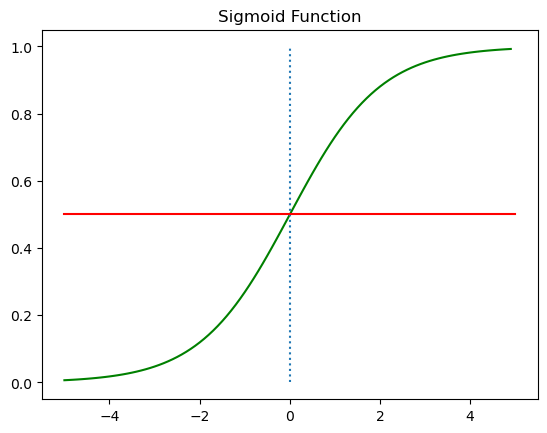

In [6]:
# w 값에 따라 경사도가 변해 주어진 데이터에 적합한 w와 b를 구하는 것이 목적
x = np.arange(-5,5,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[0,1],":") # 세로선
plt.plot([-5,5],[0.5,0.5],"r")
plt.title('Sigmoid Function')
plt.show()

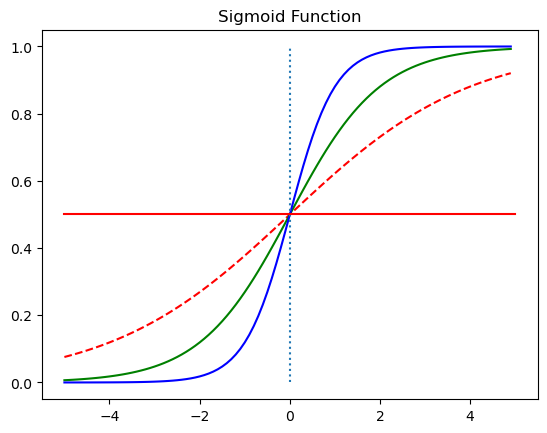

In [7]:
# w 값에 따라 경사도가 변해 주어진 데이터에 적합한 w와 b를 구하는 것이 목적
x = np.arange(-5,5,0.1)
y1 = sigmoid(0.5*x)
y2 = sigmoid(1.0*x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r--', label = 'w:0.5')
plt.plot(x,y2,'g', label = 'w:1.0')
plt.plot(x,y3,'b-', label = 'w:2.0')
plt.plot([0,0],[0,1],":") # 세로선
plt.plot([-5,5],[0.5,0.5],"r")
plt.title('Sigmoid Function')
plt.show()

# 유방암 판별 예측

## 패키지 로딩

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd

## 데이터 로드 및 확인

In [14]:
breast = load_breast_cancer()
#print(breast.DESCR)
df = pd.DataFrame(breast.data, columns=breast.feature_names)
df['target'] = breast.target
display(df.head())
print(df.shape)
print(df['target'].value_counts)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


(569, 31)
<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32>


In [18]:
# print(df.isna().sum())
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

## 종속변수/독립변수 선택

In [19]:
x = breast.data
y = breast.target

## 데이터 스케일링

In [21]:
scaled_x = StandardScaler().fit_transform(x)

## 학습 데이터 / 평가 데이터 분리

In [33]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.3, random_state=0, stratify=y) # stratify는 학습/평가 데이터 분리시 종속변수의 클래스 별 비율을 고려해서 분리

In [32]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 149, 1: 249}


## 모델 생성
- 회귀계수 최적화 옵션
  - solver: 최적화 문제에 사용할 알고리즘
  - 'lbfgs' : solver의 기본값, cpu코어수가 많으면 최적화를 병렬로 수행할 수 있다
  - 'liblinear' : 작은 데이터에 적합한 알고리즘
  - 'sag','saga' : 확률적경사하강법을 기반으로 한 알고리즘으로 대용량 데이터에 적합
  - 'newton-cg','sag','saga','linlinear'만 다항 손실을 처리할 수 있다. 멀티클래스 분류 모델에 사용가능
  - solver에 따른 규제 지원 사항
  - newton-cg, lbfgs, sag :L2
  - liblinear, saga : L1, L2
- multi_class : 다중클래스 분류 문제 상황에서 접근방식을 지정
    - 'ovr' : 이진분류문제인 sigmoid 함수를 이용하여 결과 예측
    - 'multinomial' : 각 클래스에 대한 softmax확률값으로 다중분류를 수행
- C : 규제 강도의 역수, c의 값이 작을수록 규제 강도가 커지고 모델이 단순해진다.
    - 'max_iter': solver가 수렴하는데 필요한 반복 횟수 (default:100)

In [30]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

## 모델 예측

In [50]:
y_hat = model.predict(x_test)
print(y_hat[:20])
print(y_test[:20])

[0 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0]
[0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0]


## confusion_matrix
- 혼동 행렬 함수는 행을 True(실제), 열을 Predict(예측) 값으로 이용하고 양성과 음성의 구분은 별도의 레이블을 지정하지 않으면 레이블 값을 정렬된 순서로 사용한다. ( 0 - negative, 1 - positive)
![cf](confusion_matrix.jpg)

In [49]:
matrix = confusion_matrix(y_test, y_hat)
print(matrix)

[[ 62   2]
 [  1 106]]


## 평가지표

In [57]:
accuracy = accuracy_score (y_test, y_hat)
print(f'정확도: {accuracy: .2f}') # 62+106 / 62+2+1+106
precision = precision_score(y_test, y_hat)
print(f'정밀도: {precision:.2f}') # 106 / 2+106
recall = recall_score(y_test, y_hat)
print(f'재현율: {recall:.2f}') # 106 / 1+106
pred_proba_positive = model.predict_proba(x_test)[:,1]
#print(pred_proba_positive[:4])
#pred_proba_positive에는 각 테스트 샘플에 대해 양성 클래스에 속할 확률이 포함되어 있습니다. 코드에서 [:4]는 첫 번째부터 네 번째까지의 예측 확률을 출력한다는 의미입니다.
# [[0.2, 0.8],
# 이 경우 첫 번째 샘플은 음성 클래스에 속할 확률이 0.2이고 양성 클래스에 속할 확률이 0.8입니다. 따라서 이 모델은 이 샘플을 양성으로 분류할 것으로 예상됩니다.
fpr, tpr, thresholds = roc_curve(y_test, pred_proba_positive)
roc_data = pd.DataFrame(np.concatenate([fpr.reshape(-1,1), tpr.reshape(-1,1), thresholds.reshape(-1,1)], axis =1), columns = ['FPR','TPR','THRESHOLDS'])
display(roc_data)
auc = roc_auc_score(y_test, pred_proba_positive)
print(auc)
# 거짓양성률 fpr, 

정확도:  0.98
정밀도: 0.98
재현율: 0.99


,FPR,TPR,THRESHOLDS
0,0.000000,0.000000,1.999998e+00
1,0.000000,0.009346,9.999982e-01
2,0.000000,0.906542,8.773112e-01
3,0.015625,0.906542,8.761200e-01
4,0.015625,0.934579,8.377020e-01
5,0.031250,0.934579,8.280931e-01
6,0.031250,1.000000,3.623408e-01
7,1.000000,1.000000,2.459355e-13


0.997517523364486


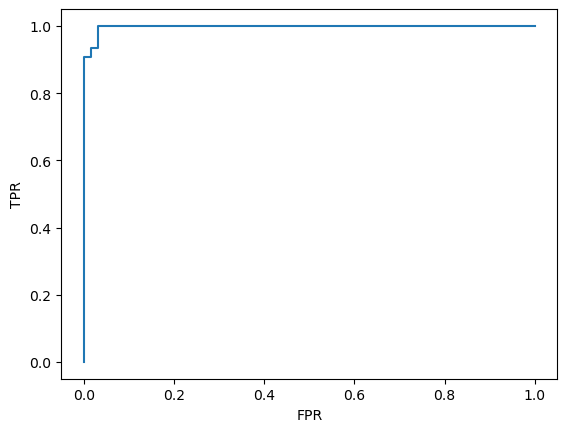

In [58]:
import matplotlib.pyplot as plt
plt.plot (fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## 최적의 임계값 찾기
- TPR(실제 양성을 양성이라고 판단한 비율)과 FPR(음성을 양성이라고 잘못판단한 위 양성률)
TPR FPR 차가 가장 큰 경우 임계치가 최적의 값임

In [64]:
optimal_threshold = thresholds[np.argmax(tpr-fpr)]
print(optimal_threshold)

0.36234077995056846


## 예측 확률
- 평가데이터의 각 레코드별 개별 클래스 예측 확률값 확인
- 분류 임계값 : 0.5

In [63]:
prob = model.predict_proba(x_test)
prob_df = pd.DataFrame(data=np.concatenate([prob, y_hat.reshape(-1, 1)], axis=1), columns=['negative(0)', 'positive(1)', 'predict class'])

print(prob_df)

     negative(0)   positive(1)  predict class
0       0.999999  9.115543e-07            0.0
1       0.123880  8.761200e-01            1.0
2       0.999216  7.835702e-04            0.0
3       0.029945  9.700551e-01            1.0
4       0.999964  3.567069e-05            0.0
..           ...           ...            ...
166     0.009005  9.909947e-01            1.0
167     0.953915  4.608461e-02            0.0
168     0.145595  8.544048e-01            1.0
169     0.002469  9.975306e-01            1.0
170     0.000002  9.999976e-01            1.0

[171 rows x 3 columns]


## 임계값 변화에 따른 재현율과 정밀도 변환 확인

In [74]:
from sklearn.metrics import classification_report

def threshold_filter(prob,threshold) :
    return np.where(prob >= threshold, 1, 0)
    
pred_1 = threshold_filter(pred_proba_positive, 0.5)
pred_2 = threshold_filter(pred_proba_positive, 0.6)
pred_3 = threshold_filter(pred_proba_positive, 0.8)

print('===================== Threshold: 0.5 ============================')
print(classification_report(y_test, pred_1))
print('===================== Threshold: 0.6 ============================')
print(classification_report(y_test, pred_2))
print('===================== Threshold: 0.8 ============================')
print(classification_report(y_test, pred_3))


===================== Threshold: 0.5 ============================
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

===================== Threshold: 0.6 ============================
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.98      0.95      0.97       107

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

===================== Threshold: 0.8 ============================
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        64
           1       0.98      0.93      

# solver 별 성능평가 비교

In [76]:
solvers = ['lbfgs','liblinear','newton-cg','sag','saga']
for solver in solvers :
    model = LogisticRegression(solver=solver, max_iter=600)
    model.fit(x_train,y_train)
    y_hat = model.predict(x_test)
    pred_proba_positive = model.predict_proba(x_test)[:,1]
    print(f'solver:{solver}, accuracy:{accuracy_score(y_test,y_hat):.3f},auc:{roc_auc_score(y_test,pred_proba_positive):.3f}')

solver:lbfgs, accuracy:0.959,auc:0.996
solver:liblinear, accuracy:0.959,auc:0.996
solver:newton-cg, accuracy:0.959,auc:0.996
solver:sag, accuracy:0.959,auc:0.996
solver:saga, accuracy:0.959,auc:0.996


# 개인 신용도 예측

## 패키지 로딩

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier

In [109]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
## 모델 예측
y_hat = model.predict(x_test)
print('실제값:', y_test[:20].values)
print('예측값:', y_hat[:20])

Predict        
               대출불허(0) 대출승인(1)
Actual 대출불허(0)    1335      21
       대출승인(1)      55      89

정확도:0.949
정밀도:0.809


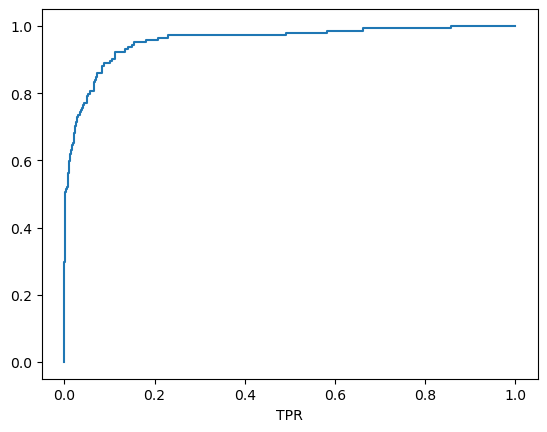

AUC:0.957


In [135]:
## 모델 성능 측정
cf = confusion_matrix(y_test,y_hat)
cf_df = pd.DataFrame(cf, index=[['Actual','Actual'],['대출불허(0)','대출승인(1)']],columns=[['Predict','Predict'],['대출불허(0)','대출승인(1)']])
display(cf_df)
print(f'정확도:{accuracy_score(y_test, y_hat):.3f}')
print(f'정밀도:{precision_score(y_test, y_hat):.3f}')
fpr, tpr, thresholds = roc_curve(y_test,model.predict_proba(x_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.xlabel('TPR')
plt.show()
print(f'AUC:{roc_auc_score(y_test,model.predict_proba(x_test)[:,1]):.3f}')

## 교차검증

In [133]:
scores = cross_validate(model, scaled_x, y, cv=10, scoring=['accuracy','precision','roc_auc'])
#print(scores)
for key, val in scores.items():
    print('평가지표:',key)
    print(f'평균값:{np.mean(val):.3f}')

평가지표: fit_time
평균값:0.029
평가지표: score_time
평균값:0.006
평가지표: test_accuracy
평균값:0.950
평가지표: test_precision
평균값:0.812
평가지표: test_roc_auc
평균값:0.958


## 학습이 완료된 모델을 파일로 저장

In [136]:
import joblib
joblib.dump(model, './loan.pkl') # 모델학습 결과를 피클파일로 저장

['./loan.pkl']

In [137]:
loaded_model = joblib.load('./loan.pkl')
score = loaded_model.score(x_test,y_test)
print(score)

0.9493333333333334
